In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

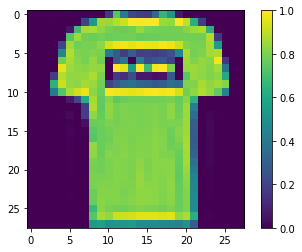

In [ ]:
plt.imshow(train_images[1])
plt.grid(False)
plt.colorbar()
plt.show()

In [ ]:
test_images = test_images.reshape(len(test_images), 28, 28, 1)
train_images = train_images.reshape(len(train_images), 28, 28, 1)

In [ ]:
def build_model(hp):
  model = keras.Sequential(
      [
       keras.layers.Conv2D(
           filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),
           kernel_size = hp.Choice('conv_1_kernel', values= [3,5]),
           activation = 'relu',
           input_shape = (28, 28, 1)
       ),
       keras.layers.Conv2D(
           filters = hp.Int('conv_2_filter', min_value = 32, max_value = 64, step = 16),
           kernel_size = hp.Choice('conv_2_kernel', values= [3,5]),
           activation = 'relu',
       ),
       keras.layers.Flatten(),
       keras.layers.Dense(
           units = hp.Int('dense_1_units', min_value = 32, max_value = 128, step = 16),
           activation = 'relu'
       )
      ])
  model.compile( optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])), loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])
  return model


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory = 'output', project_name = 'Mnist Fashion')

In [ ]:
tuner_search.search(train_images, train_labels, epochs = 3, validation_split = 0.1)

Trial 5 Complete [00h 31m 22s]
val_accuracy: 0.09849999845027924

Best val_accuracy So Far: 0.10499999672174454
Total elapsed time: 01h 22m 48s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner_search.get_best_models(num_models = 1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 48)        55344     
_________________________________________________________________
flatten (Flatten)            (None, 27648)             0         
_________________________________________________________________
dense (Dense)                (None, 112)               3096688   
Total params: 3,153,312
Trainable params: 3,153,312
Non-trainable params: 0
_________________________________________________________________
